In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [2]:
tmin = 0
tmax = 1000
dt = 0.01

#Constants
Gna = 30
Gkdr = 15
Gkca = 15
Gkahp = 0.8
Gca = 10
Gl = 0.1
Gc = 2.1
Vna = 60
Vk = -75
Vca = 80
Vl = -60
p = 0.5
Ca = 0.21664282
Cm = 3

Isapp = 0.3
Idapp = 0

In [35]:
#Alpha and Beta functions and Chi
def H(X):
    if X < 0:
        return 0
    else: 
        return 1

def alphaM(Vs):
    return (0.32*(-46.9 - Vs)/(np.exp((-46.9 - Vs)/4) - 1))

def betaM(Vs):
    return (0.28*(Vs + 19.9)/(np.exp((Vs + 19.9)/5) - 1))

def alphaN(Vs):
    return ((0.016*(-24.9 - Vs))/(np.exp((-24.9 - Vs)/5) - 1))

def betaN(Vs):
    return (0.25*np.exp(-1 - 0.025*Vs))

def alphaH(Vs):
    return (0.128*np.exp((-43-Vs)/18))

def betaH(Vs):
    return (4/(1 + np.exp((-20-Vs)/5)))

def alphaS(Vd):
    return (1.6/(1 + np.exp(-0.072*(Vd - 5))))

def betaS(Vd):
    return (0.02*(Vd + 8.9)/(np.exp((Vd + 8.9)/5) - 1))

def alphaC(Vd):
    return ((1 - H(Vd + 10)*np.exp((Vd + 50)/11 - (Vd + 53.5)/27)/18.975) + H(Vd + 10)*(2*np.exp((-53.5-Vd)/27)))

def betaC(Vd):
    return ((1 - H(Vd + 10))*(2*np.exp((-53.5 - Vd)/27) - alphaC(Vd)))

def alphaQ(Ca):
    return (min(0.00002*Ca,0.01))

def betaQ(Ca):
    return (0.001)

#def chi(Ca):
   # return (min(Ca/250,1))

#RK

def dVdt(V, t):
    Vs, Vd, m, n, h, s, c, q = V
    
    #Equations for currents
    Ina = Gna * (alphaM(Vs)/(alphaM(Vs) + betaM(Vs)))**2 * h * (Vs - Vna) #Mi is minfinity
    Ikdr = Gkdr * n * (Vs - Vk)
    Ica = Gca * s**2 * (Vd - Vca)
    Ikca = Gkca * c * (1.073*np.sin(0.003453*Ca+0.08095) + 0.08408*np.sin(0.01634*Ca-2.34) + 0.01811*np.sin(0.0348*Ca-0.9918)) * (Vd - Vk)
    Ikahp = Gkahp * q * (Vd - Vk)
    Isd = Gc * (Vs - Vd)
    Ids = -Isd
    Ileakd = Gl * (Vd - Vl)
    Ileaks = Gl * (Vs - Vl)

    dvsdt = (-Ileaks - Ina - Ikdr - Ids/p + Isapp/p)/Cm
    dvddt = (-Ileakd - Ica - Ikca - Ikahp + Isd/(1-p) + Idapp/(1-p))/Cm
    dmdt = (((alphaM(Vs)/(alphaM(Vs) + betaM(Vs))) - m)/(1/(alphaM(Vs) + betaM(Vs))))
    dndt = (((alphaN(Vs)/(alphaN(Vs) + betaN(Vs))) - n)/(1/(alphaN(Vs) + betaN(Vs))))
    dhdt = (((alphaH(Vs)/(alphaH(Vs) + betaH(Vs))) - h)/(1/(alphaH(Vs) + betaH(Vs))))
    dsdt = (((alphaS(Vd)/(alphaS(Vd) + betaS(Vd))) - s)/(1/(alphaS(Vd) + betaS(Vd))))
    dcdt = (((alphaC(Vd)/(alphaC(Vd) + betaC(Vd))) - c)/(1/(alphaC(Vd) + betaC(Vd))))
    dqdt = (((alphaQ(Ca)/(alphaQ(Ca) + betaQ(Ca))) - q)/(1/(alphaQ(Ca) + betaQ(Ca))))

    return dvsdt, dvddt, dmdt, dndt, dhdt, dsdt, dcdt, dqdt

In [36]:
T = np.arange(tmin,tmax,dt)
V0 = [-62.89223689, -62.98248752, 0.5, 0.00068604, 0.99806345, 0.01086703, 0.00809387, 0.0811213] #Initital values need to be feeded
sol = odeint(dVdt, V0, T)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


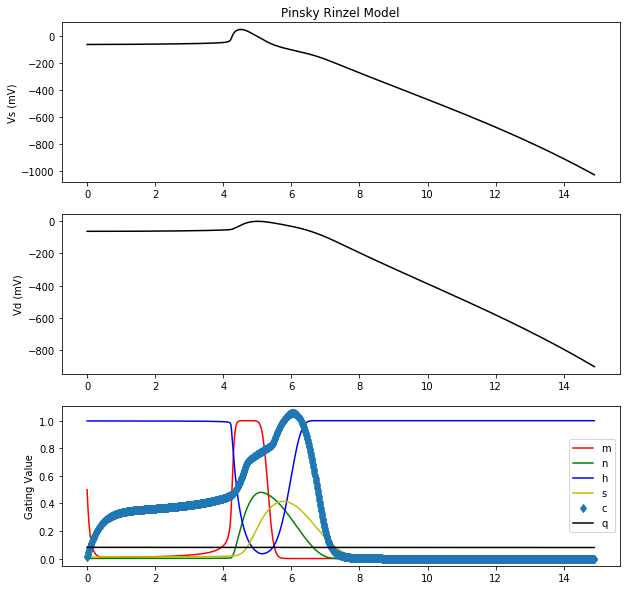

In [37]:
Vs = sol[:,0]
Vd = sol[:,1]
m = sol[:,2]
n = sol[:,3]
h = sol[:,4]
s = sol[:,5]
c = sol[:,6]
q = sol[:,7]

plt.figure(figsize=(10, 10))

plt.subplot(3,1,1)
plt.title('Pinsky Rinzel Model')
plt.plot(T, Vs, 'k')
plt.ylabel('Vs (mV)')

plt.subplot(3,1,2)
plt.plot(T, Vd, 'k')
plt.ylabel('Vd (mV)')

plt.subplot(3,1,3)
plt.plot(T, m, 'r', label='m')
plt.plot(T, n, 'g', label='n')
plt.plot(T, h, 'b', label='h')
plt.plot(T, s, 'y', label='s')
plt.plot(T, c, 'd', label='c')
plt.plot(T, q, 'k', label='q')
plt.ylabel('Gating Value')
plt.legend()

plt.show()